In [2]:
import random
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

random_state = random.randint(0, 500)
X, y = make_classification(n_samples=200, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=random_state, flip_y=5.5)

In [3]:
X

array([[-1.24130878e+00,  1.21797870e+00],
       [-9.39012121e-01,  1.01100197e+00],
       [-1.69704559e+00, -5.20748243e-01],
       [ 1.52589729e+00,  1.58415413e+00],
       [ 3.18123105e-01, -5.91629268e-01],
       [ 1.55793183e+00,  3.66581367e-01],
       [ 8.78070803e-01, -2.39009881e+00],
       [-8.75756605e-01,  1.04350395e+00],
       [-5.09721225e-02,  6.07738206e-01],
       [ 9.39893082e-01,  1.02549611e+00],
       [ 5.34320846e-01, -1.58502990e+00],
       [-1.61501971e+00,  9.78248356e-01],
       [-2.30377448e+00,  9.11756473e-01],
       [-1.08314018e+00,  7.51908019e-01],
       [-8.91479600e-01,  5.71230957e-01],
       [ 1.32426307e+00,  1.24030284e+00],
       [ 1.91907460e-01,  5.27633176e-01],
       [ 7.54154605e-01, -4.72283494e-01],
       [ 2.25329279e+00,  1.22973249e+00],
       [ 8.25648439e-01,  1.15678872e+00],
       [-2.45709165e-01, -1.74173013e+00],
       [ 1.39797193e+00, -3.61259511e-01],
       [-3.59105097e-01, -1.55378860e+00],
       [ 2.

In [4]:
y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1])

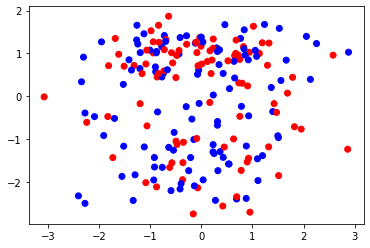

In [5]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [6]:
# Divide the dataset into training and test samples in the ratio 70/30.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [7]:
# Create a linear classification model using the L2 regularizer and train it on the training set.
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='l2', random_state=random_state)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=350)

In [8]:
from sklearn.linear_model import SGDClassifier

classifiers = [
    SGDClassifier(loss='hinge', penalty='l2', random_state=random_state),
    SGDClassifier(loss='modified_huber', penalty='l1', random_state=random_state),
]

In [9]:
# assess the quality of these models using the metrics of accuracy, recall, and F-measures.
from sklearn.metrics import accuracy_score, recall_score, f1_score


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, recall, f1


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    accuracy, recall, f1 = evaluate_model(classifier, X_test, y_test)
    print('Accuracy: {:.2f}'.format(accuracy))
    print('Recall: {:.2f}'.format(recall))
    print('F1: {:.2f}'.format(f1))
    print()

Accuracy: 0.35
Recall: 0.44
F1: 0.42

Accuracy: 0.33
Recall: 0.28
F1: 0.31



In [11]:
# Get the error matrix. Using this matrix, calculate the values of precision, recall and F1 score.
from sklearn.metrics import confusion_matrix


def get_error_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    error_matrix = get_error_matrix(classifier, X_test, y_test)
    print('Error Matrix:')
    print(error_matrix)
    print()
    print('Precision: {:.2f}'.format(error_matrix[1, 1] / (error_matrix[1, 1] + error_matrix[0, 1])))
    print('Recall: {:.2f}'.format(error_matrix[1, 1] / (error_matrix[1, 1] + error_matrix[1, 0])))
    print('F1: {:.2f}'.format(2 * error_matrix[1, 1] / (error_matrix[1, 1] + error_matrix[0, 1] + error_matrix[1, 0])))
    print()

Error Matrix:
[[ 7 21]
 [18 14]]

Precision: 0.40
Recall: 0.44
F1: 0.53

Error Matrix:
[[11 17]
 [23  9]]

Precision: 0.35
Recall: 0.28
F1: 0.37



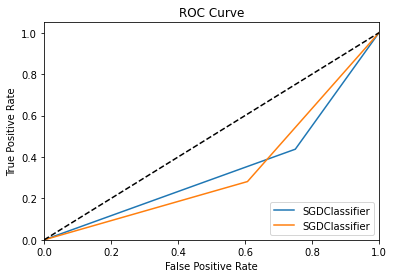

In [12]:
# Obtain the FPR and TPR values for the models under consideration.
from sklearn.metrics import roc_curve


def get_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    return fpr, tpr


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    fpr, tpr = get_roc_curve(classifier, X_test, y_test)
    plt.plot(fpr, tpr, label=classifier.__class__.__name__)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()